In [ ]:
import sys
import os

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

import numpy as np
import matplotlib.pyplot as plt
from lib.grad_check import check_gradients
from lib.network import Network
from lib.layers import Dense
from lib.activations import Tanh, Sigmoid
from lib.losses import MeanSquaredError
from lib.optimizer import SGD

print("Done. Ready for XOR data.")

Done. Ready for XOR data.


In [2]:
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

Y = np.array([
    [0],
    [1],
    [1],
    [0]
])

Epoch 1/10000 - Loss: 0.093079
Epoch 1001/10000 - Loss: 0.030646
Epoch 2001/10000 - Loss: 0.029639
Epoch 3001/10000 - Loss: 0.028188
Epoch 4001/10000 - Loss: 0.026014
Epoch 5001/10000 - Loss: 0.022999
Epoch 6001/10000 - Loss: 0.019071
Epoch 7001/10000 - Loss: 0.014324
Epoch 8001/10000 - Loss: 0.009491
Epoch 9001/10000 - Loss: 0.005733
Epoch 10000/10000 - Loss: 0.003436


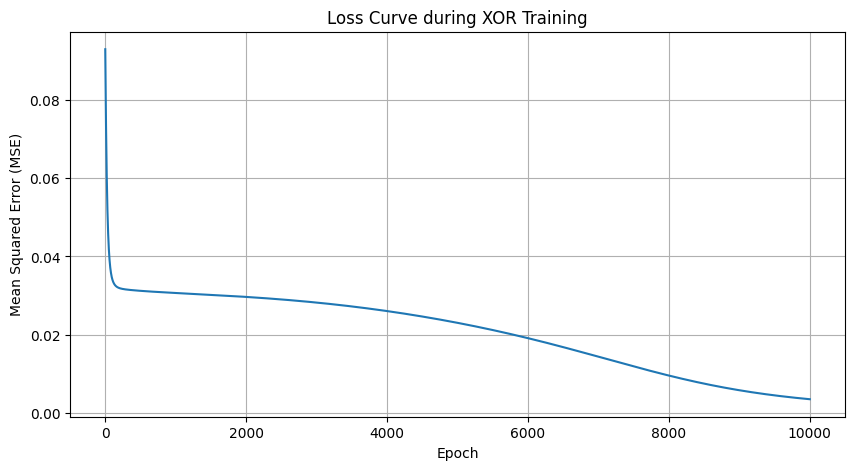

In [3]:
net = Network()

net.add(Dense(2, 4))
net.add(Tanh())

net.add(Dense(4, 1))
net.add(Sigmoid()) 

optimizer = SGD(learning_rate=0.01) 
loss_func = MeanSquaredError()
net.compile(optimizer, loss_func)

epochs = 10000
history = net.fit(X, Y, epochs=epochs, batch_size=4, verbose=1000)
plt.figure(figsize=(10, 5))
plt.plot(history)
plt.title('Loss Curve during XOR Training')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid(True)
plt.show()

In [4]:
Y_pred = net.predict(X)

print("------------------------------------------------")
print("Input   | Target | Predicted Output (Rounded)")
print("------------------------------------------------")

for i in range(len(X)):
    rounded_output = np.round(Y_pred[i][0]) 
    print(f"{X[i]}    | {Y[i][0]}      | {Y_pred[i][0]:.4f} (-> {rounded_output})")

print("------------------------------------------------")
accuracy = np.mean(np.round(Y_pred) == Y)
print(f"Accuracy: {accuracy * 100:.2f}%")

------------------------------------------------
Input   | Target | Predicted Output (Rounded)
------------------------------------------------
[0 0]    | 0      | 0.0604 (-> 0.0)
[0 1]    | 1      | 0.8037 (-> 1.0)
[1 0]    | 1      | 0.7687 (-> 1.0)
[1 1]    | 0      | 0.1193 (-> 0.0)
------------------------------------------------
Accuracy: 100.00%


In [ ]:
from lib.grad_check import check_gradients

net_check = Network()
net_check.add(Dense(2, 4))
net_check.add(Tanh())
net_check.add(Dense(4, 1))
net_check.add(Sigmoid())

loss_func_check = MeanSquaredError()
net_check.loss_function = loss_func_check 

print("Starting Gradient Check...")
max_error = check_gradients(net_check, X, Y)
print(f"Maximum Relative Error found: {max_error:.8f}")

Starting Gradient Check...
----------------------------------------------------------------------
Layer | Weight Shape | Max Diff | Status
----------------------------------------------------------------------
 W1   | (2, 4) | 0.00000000 | OK
 B1   | (1, 4) | 0.00000000 | OK
 W2   | (4, 1) | 0.00000000 | OK
 B2   | (1, 1) | 0.00000000 | OK
----------------------------------------------------------------------
Maximum Relative Error found: 0.00000000
